# Mid-semester assignment Part 2 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Ori Malca 315150599
<br>
Student 2: Kfir Sitalkil 208722660

## Fashion MNIST with Keras
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://cloudxlab.com/blog/wp-content/uploads/2019/06/Tensorflow_Keras.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

# Neural Network with Tensorflow Keras part 1 (Binary Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

## Load Dataset

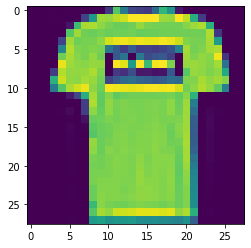

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[1])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data preprocessing



```
# This is formatted as code
```

### Feature scaling

In [ ]:
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Select two classes

#### Selected idexes for two classes (T-shirt = 0, Sneaker = 7)

In [ ]:
index_train = np.where((y_train == 0) | (y_train == 7))
index_test = np.where((y_test == 0) | (y_test == 7))

#### extract the two desired classes by their indexes

In [ ]:
x_train = x_train[index_train[0],:]
y_train = y_train[index_train[0]]
x_test = x_test[index_test[0],:]
y_test = y_test[index_test[0]]

#### Change all labels from 7 to 1 (T-shirt = 0, sneaker = 1)

In [ ]:
y_train[y_train == 7] = 1
y_test[y_test == 7] = 1

#### The current shape of the data set:

In [ ]:
print(f'x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_test: {y_test.shape}')

x_train: (12000, 784)
y_train: (12000,)
x_test: (2000, 784)
y_test: (2000,)


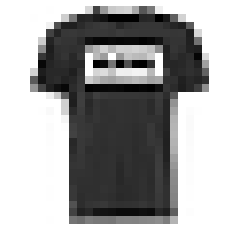

0

In [ ]:
import matplotlib
plt.imshow(x_train[0].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
y_train[0]


We need to convert 1-dimensional class arrays to multi-dimensional class matrices<br>


`np_utils.to_categorical` is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.<br>
Read about np_utils here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
from keras.utils import np_utils
num_classes = 2
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

### Build the network layers
Read about Fully connected layers in keras here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# WRITE YOUR CODE HERE
model.add(Dense(784, activation='sigmoid', kernel_initializer='he_uniform', input_shape=(784,)))
model.add(Dense(2, activation='sigmoid', kernel_initializer='he_uniform'))


### Build the Optimizer
Read about the Optimizer here: https://keras.io/api/optimizers/

In [ ]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)

### compile the model

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.output_shape)

(None, 2)


### Training
Use the fit method to train your model, then store the results within the variable "history".


In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
300/300 [==============================] - 3s 6ms/step - loss: 0.4723 - accuracy: 0.9000 - val_loss: 0.3133 - val_accuracy: 0.9796
Epoch 2/5
300/300 [==============================] - 2s 6ms/step - loss: 0.2516 - accuracy: 0.9796 - val_loss: 0.1981 - val_accuracy: 0.9875
Epoch 3/5
300/300 [==============================] - 2s 6ms/step - loss: 0.1736 - accuracy: 0.9872 - val_loss: 0.1460 - val_accuracy: 0.9917
Epoch 4/5
300/300 [==============================] - 2s 5ms/step - loss: 0.1339 - accuracy: 0.9904 - val_loss: 0.1162 - val_accuracy: 0.9937
Epoch 5/5
300/300 [==============================] - 2s 5ms/step - loss: 0.1097 - accuracy: 0.9925 - val_loss: 0.0969 - val_accuracy: 0.9954


### Save Trained model (weights)
Read about Save and load models in tensorflow.keras here: [https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)


In [ ]:
# SAVE THE TRAINED MODEL
!mkdir -p /content/drive/MyDrive/saved_model
model.save('/content/drive/MyDrive/saved_model/binary_model')

### Loss and Accuracy Visualization
Show  on plot the lose during training

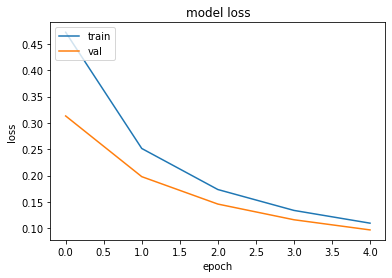

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Show  on plot the accuracy during training

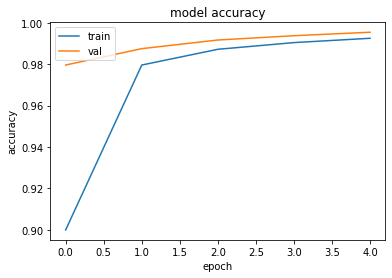

In [ ]:
# WRITE YOUR CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
# WRITE YOUR CODE HERE
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)

63/63 [==============================] - 0s 3ms/step


0.986

### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
# WRITE YOUR CODE HERE
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[993   7]
 [  1 999]]


#### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1000
           1       0.99      1.00      1.00      1000

   micro avg       1.00      0.99      0.99      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      0.99      0.99      2000
 samples avg       0.99      0.99      0.99      2000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
<br>


# Neural Network with Tensorflow Keras part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Load Dataset

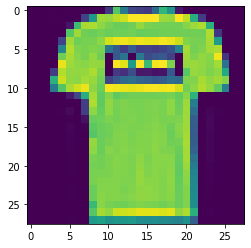

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[1])
plt.show()

### The rest you will have to create yourself...

## Data preprocessing

### Feature scaling

In [ ]:
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### The current shape of the data set:

In [ ]:
print(f'x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_test: {y_test.shape}')

x_train: (60000, 784)
y_train: (60000,)
x_test: (10000, 784)
y_test: (10000,)


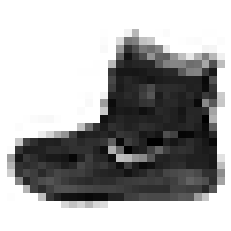

9

In [ ]:
import matplotlib
plt.imshow(x_train[0].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
y_train[0]

convert 1-dimensional class arrays to multi-dimensional class matrices<br>

In [ ]:
from keras.utils import np_utils
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Models

### Base Model

#### Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# WRITE YOUR CODE HERE
model.add(Dense(784, activation='sigmoid', kernel_initializer='he_uniform', input_shape=(784,)))
model.add(Dense(10, activation='softmax', kernel_initializer='he_uniform'))

#### Build the Optimizer

In [ ]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)

#### Compile the model

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.output_shape)

(None, 10)


#### Training

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.0117 - accuracy: 0.4660 - val_loss: 1.7309 - val_accuracy: 0.6064
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5533 - accuracy: 0.6763 - val_loss: 1.3974 - val_accuracy: 0.7010
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.2977 - accuracy: 0.7042 - val_loss: 1.2005 - val_accuracy: 0.7151
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1411 - accuracy: 0.7175 - val_loss: 1.0743 - val_accuracy: 0.7224
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0369 - accuracy: 0.7259 - val_loss: 0.9884 - val_accuracy: 0.7335


#### Loss and Accuracy Visualization
Show  on plot the lose during training

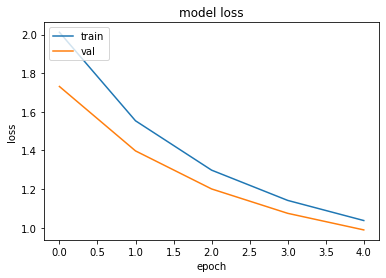

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Show  on plot the accuracy during training

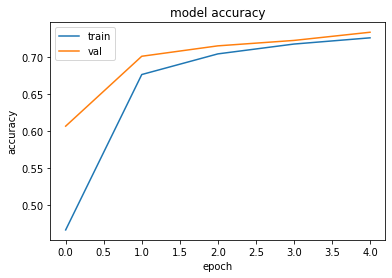

In [ ]:
# WRITE YOUR CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
# WRITE YOUR CODE HERE
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


0.3648

#### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
# WRITE YOUR CODE HERE
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[992   0   0   4   0   2   0   0   2   0]
 [241 755   0   4   0   0   0   0   0   0]
 [923   0  71   0   6   0   0   0   0   0]
 [673   0   0 327   0   0   0   0   0   0]
 [973   0   4   2  21   0   0   0   0   0]
 [618   0   0   0   0 330   0  33   0  19]
 [987   0   4   3   2   0   0   0   4   0]
 [346   0   0   0   0   7   0 623   0  24]
 [509   0   0   0   0   0   0   3 488   0]
 [237   0   0   0   0   0   0  21   0 742]]


#### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.29      0.44      1000
           1       1.00      0.76      0.86      1000
           2       0.90      0.07      0.13      1000
           3       0.96      0.33      0.49      1000
           4       0.72      0.02      0.04      1000
           5       0.97      0.33      0.49      1000
           6       0.00      0.00      0.00      1000
           7       0.92      0.62      0.74      1000
           8       0.99      0.49      0.65      1000
           9       0.95      0.74      0.83      1000

   micro avg       0.96      0.36      0.53     10000
   macro avg       0.83      0.36      0.47     10000
weighted avg       0.83      0.36      0.47     10000
 samples avg       0.36      0.36      0.36     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Experiment number 1

#### Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# WRITE YOUR CODE HERE
model.add(Dense(784, activation='relu', kernel_initializer='he_uniform', input_shape=(784,)))
model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax', kernel_initializer='he_uniform'))

#### Build the Optimizer

In [ ]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.001)

#### Compile the model

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.output_shape)

(None, 10)


#### Training

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test,y_test), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1534 - accuracy: 0.6540 - val_loss: 0.7997 - val_accuracy: 0.7498
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7016 - accuracy: 0.7790 - val_loss: 0.6555 - val_accuracy: 0.7911
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6055 - accuracy: 0.8072 - val_loss: 0.5984 - val_accuracy: 0.8022
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5563 - accuracy: 0.8191 - val_loss: 0.5654 - val_accuracy: 0.8109
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5255 - accuracy: 0.8269 - val_loss: 0.5348 - val_accuracy: 0.8213


#### Loss and Accuracy Visualization
Show  on plot the lose during training

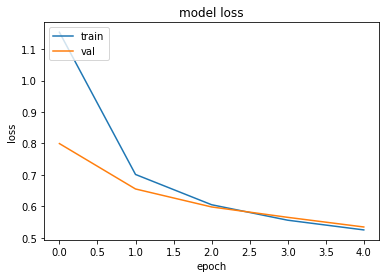

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Show  on plot the accuracy during training

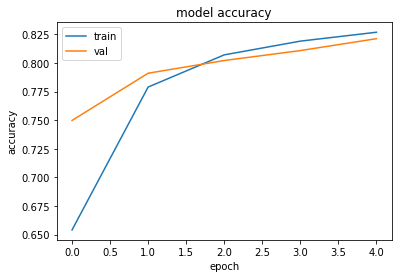

In [ ]:
# WRITE YOUR CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
# WRITE YOUR CODE HERE
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


0.7469

#### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
# WRITE YOUR CODE HERE
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[910   3   4  34   3   1  34   0  11   0]
 [ 40 924   7  24   4   0   0   0   1   0]
 [269   0 599   5  93   0  29   0   5   0]
 [198   9   1 760  16   0  14   0   2   0]
 [255   2  58  22 639   0  19   0   5   0]
 [ 85   0   0   0   0 837   0  51   2  25]
 [501   1  86  20  78   0 295   0  19   0]
 [ 47   0   0   0   0  24   0 877   0  52]
 [ 76   1   8   3   1   3   9   7 892   0]
 [ 20   0   0   1   0   9   0  46   1 923]]


#### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1000
           1       0.98      0.92      0.95      1000
           2       0.79      0.60      0.68      1000
           3       0.87      0.76      0.81      1000
           4       0.77      0.64      0.70      1000
           5       0.96      0.84      0.89      1000
           6       0.74      0.29      0.42      1000
           7       0.89      0.88      0.89      1000
           8       0.95      0.89      0.92      1000
           9       0.92      0.92      0.92      1000

   micro avg       0.88      0.75      0.81     10000
   macro avg       0.87      0.75      0.80     10000
weighted avg       0.87      0.75      0.80     10000
 samples avg       0.75      0.75      0.75     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Experiment number 2

#### Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# WRITE YOUR CODE HERE
model.add(Dense(784, activation='relu', kernel_initializer='he_uniform', input_shape=(784,)))
model.add(Dense(512,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax', kernel_initializer='he_uniform'))

#### Build the Optimizer

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

#### Compile the model

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.output_shape)

(None, 10)


#### Training

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test,y_test), verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.4641 - accuracy: 0.8332 - val_loss: 0.3866 - val_accuracy: 0.8615
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3448 - accuracy: 0.8737 - val_loss: 0.3569 - val_accuracy: 0.8704
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3068 - accuracy: 0.8859 - val_loss: 0.3624 - val_accuracy: 0.8735
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2857 - accuracy: 0.8932 - val_loss: 0.3430 - val_accuracy: 0.8761
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2660 - accuracy: 0.9009 - val_loss: 0.3309 - val_accuracy: 0.8840
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2513 - accuracy: 0.9054 - val_loss: 0.3263 - val_accuracy: 0.8819
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2377 - accuracy: 0.9107 - val_loss: 0.3422 - val_accuracy: 0.8788
Epoch 

#### Loss and Accuracy Visualization
Show  on plot the lose during training

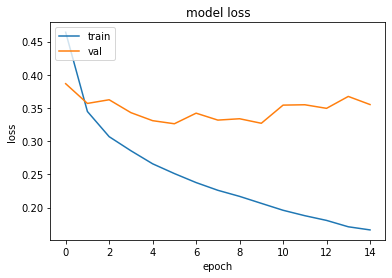

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Show  on plot the accuracy during training

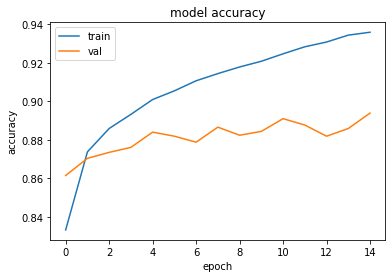

In [ ]:
# WRITE YOUR CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
# WRITE YOUR CODE HERE
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


0.886

#### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
# WRITE YOUR CODE HERE
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[868   2  19  11   2   2  88   0   8   0]
 [  3 986   1   6   1   0   2   0   1   0]
 [ 40   2 856   4  54   0  43   0   1   0]
 [ 62   8   9 850  44   0  23   1   3   0]
 [ 37   0 115  14 791   0  39   0   4   0]
 [  2   0   0   0   0 945   0  44   1   8]
 [149   0  90  15  59   0 675   0  12   0]
 [  0   0   0   0   0   3   0 980   0  17]
 [ 10   0   0   1   2   1   3   4 979   0]
 [  0   0   0   0   0   6   1  39   0 954]]


#### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.79      0.86      0.82      1000
           3       0.94      0.85      0.89      1000
           4       0.83      0.79      0.81      1000
           5       0.99      0.94      0.97      1000
           6       0.77      0.68      0.72      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

   micro avg       0.90      0.89      0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000
 samples avg       0.89      0.89      0.89     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Save Trained model (weights)


In [ ]:
# SAVE THE TRAINED MODEL
!mkdir -p /content/drive/MyDrive/saved_model
model.save('/content/drive/MyDrive/saved_model/multiclass_model.h5')

## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

### Load trained model

In [ ]:
!gdown --id 1-5i7uNKvy9idYRXG3lPnDP7k14jD1wI5
!unzip /content/mid_sem_dl_part2.zip

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-5i7uNKvy9idYRXG3lPnDP7k14jD1wI5
To: /content/mid_sem_dl_part2.zip
100% 11.3M/11.3M [00:00<00:00, 63.4MB/s]
Archive:  /content/mid_sem_dl_part2.zip
  inflating: multiclass_model.h5     
  inflating: readme.md               


In [ ]:
test_model = tf.keras.models.load_model('/content/multiclass_model.h5')

### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single image of an item of clothing (28x28 image).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before) and prints a prediction.

In [ ]:
from numpy import load as load_npy
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving Sandal_5.npy to Sandal_5.npy
User uploaded file "Sandal_5.npy" with length 912 bytes


In [ ]:
# WRITE HERE THE TEST 
clothes = {0: 'T-shirt', 1: 'Trouser', 2: 'pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
           8: 'Bag', 9: 'Ankle boot'}
filename = next(iter(uploaded))
img = np.load("/content/" + filename).astype("float32")
img /= 255
print(img.shape)
result = test_model.predict(img.reshape(1,784))
print(f"class: {np.argmax(result)}, item: {clothes.get(np.argmax(result))}")

(28, 28)
1/1 [==============================] - 3s 3s/step
class: 5, item: Sandal
